In [1]:
import string
import re
from collections import defaultdict
from collections import  Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

## https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove#Loading-the-data-and-getting-basic-idea

In [3]:
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/macintosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
special = string.punctuation

In [52]:
data = pd.read_csv('data/train.csv')

In [6]:
data.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1

In [37]:
x = data.target.value_counts()
x.index

Int64Index([0, 1], dtype='int64')

/home/macintosh/PycharmVenv/ml2course/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

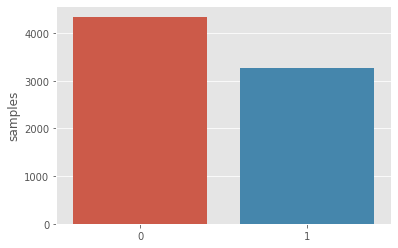

In [7]:
x = data.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

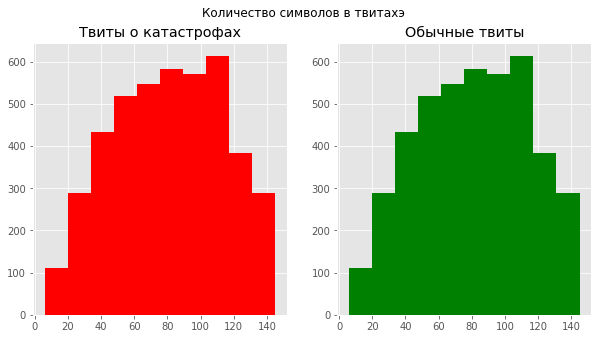

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==0]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Твиты о катастрофах')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Обычные твиты')
fig.suptitle('Количество символов в твитахэ')
plt.show()

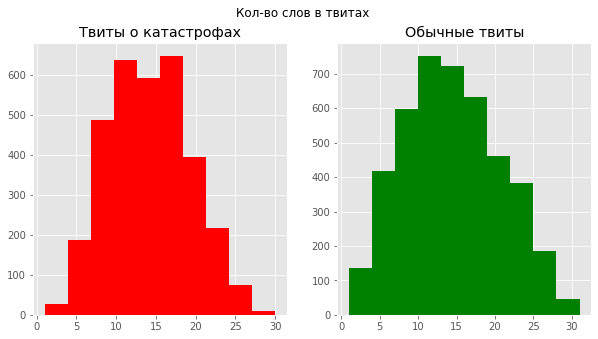

In [40]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Твиты о катастрофах')
tweet_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Обычные твиты')
fig.suptitle('Кол-во слов в твитах')
plt.show()

/home/macintosh/PycharmVenv/ml2course/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/macintosh/PycharmVenv/ml2course/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

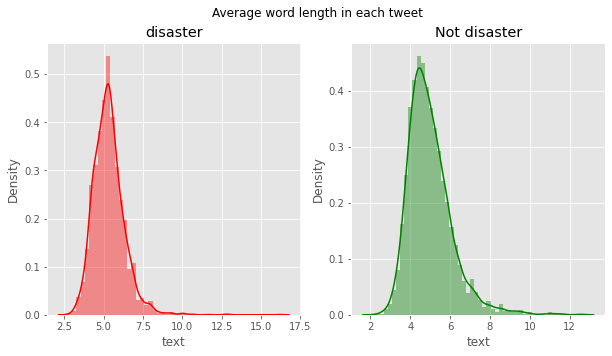

In [41]:


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')



In [11]:
def create_corpus(target):
    corpus=[]
    
    for x in data[data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [45]:
corpus = create_corpus(0)
dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
top

[('the', 1532),
 ('a', 1121),
 ('to', 1105),
 ('and', 845),
 ('of', 840),
 ('in', 731),
 ('you', 557),
 ('is', 519),
 ('for', 455),
 ('my', 442)]

<BarContainer object of 10 artists>

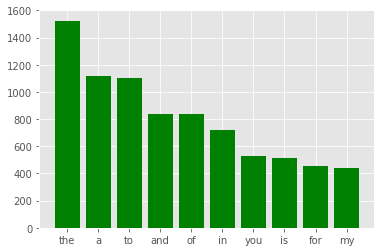

In [13]:
x,y=zip(*top)
plt.bar(x,y, color='green')

In [14]:
corpus = create_corpus(1)
dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

In [56]:
top

[('the', 1532),
 ('a', 1121),
 ('to', 1105),
 ('and', 845),
 ('of', 840),
 ('in', 731),
 ('you', 557),
 ('is', 519),
 ('for', 455),
 ('my', 442)]

<BarContainer object of 10 artists>

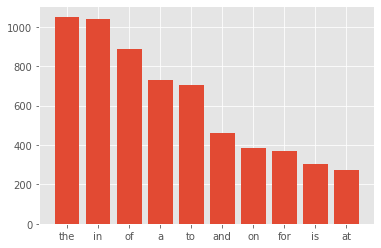

In [63]:
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

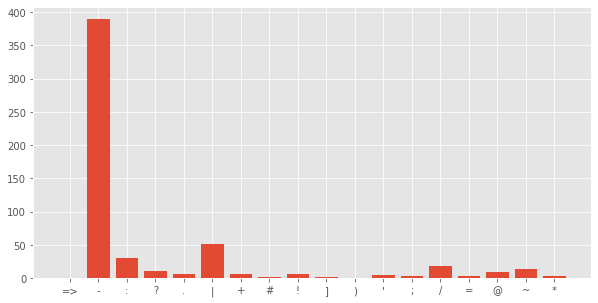

In [53]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

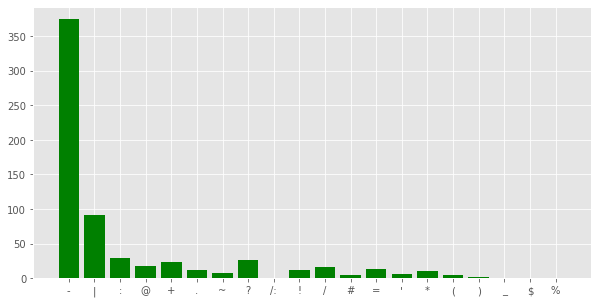

In [68]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')


In [63]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<AxesSubplot:>

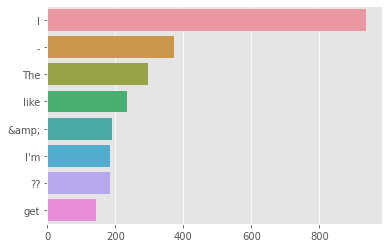

In [69]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [18]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

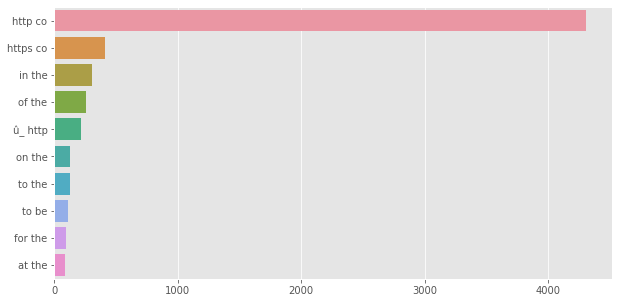

In [20]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(data['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)



In [21]:
url_example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [24]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(url_example)

'New competition launched :'

In [59]:
url = re.compile(r'https?://\S+|www\.\S+')
url.sub(r'', url_example)

'New competition launched :'

In [25]:
data['text']=data['text'].apply(lambda x : remove_URL(x))

In [26]:
html_example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [28]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(html_example))


Real or Fake
Kaggle 
getting started



In [29]:
data['text']=data['text'].apply(lambda x : remove_html(x))

In [30]:
emoji_example = 'Omg another Earthquake 😔😔'

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji(emoji_example)

'Omg another Earthquake '

In [32]:
data['text']=data['text'].apply(lambda x : remove_emoji(x))

In [33]:
punct_example="I am a #king"

In [34]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

remove_punct(punct_example)

'I am a king'

In [35]:
data['text']=data['text'].apply(lambda x : remove_punct(x))

In [2]:
pd.numpy

AttributeError: module 'pandas' has no attribute 'numpy'